# lil_buffer_writer in action

In this example we will observe the benefits of writing out raw responses then reading them out later as opposed to decoding

In [1]:
import http.client
import lil_buff_writer

def get_image(image_url):
    image_url = image_url.replace("https://", "")
    host, path = image_url.split("/", 1)
    path = "/" + path
    conn = http.client.HTTPSConnection(host)
    conn.request("GET", path)
    response = conn.getresponse()
    image_data = response.read() if response.status == 200 else None
    conn.close()
    return image_data


image_urls = [
    "raw.githubusercontent.com/alexgalkin/devicons/master/png_128/python-plain.png",
    "raw.githubusercontent.com/alexgalkin/devicons/master/png_128/html5-plain.png",
    "raw.githubusercontent.com/alexgalkin/devicons/master/png_128/cplusplus-plain.png",
    "raw.githubusercontent.com/alexgalkin/devicons/master/png_128/javascript-plain.png",
] * 10


In [2]:
import os
os.makedirs("images", exist_ok=True)

def write_images_standard():
    for i, image_url in enumerate(image_urls):
        image_data = get_image(image_url)
        assert image_data is not None
        with open(f"images/example_{i}_{image_url.split('/')[-1]}", "wb") as image_file:
                image_file.write(image_data)


async def write_image_buffs():
    def get_images():
        for i, image_url in enumerate(image_urls):
            image_data = get_image(image_url)
            yield f"example_{i}_{image_url.split('/')[-1]}".encode(), image_data
    
    await lil_buff_writer.write_messages(get_images(), "images/example_buffs.bin")
    

In [3]:
await write_image_buffs()

In [4]:
write_images_standard()

example_0_python-plain.png


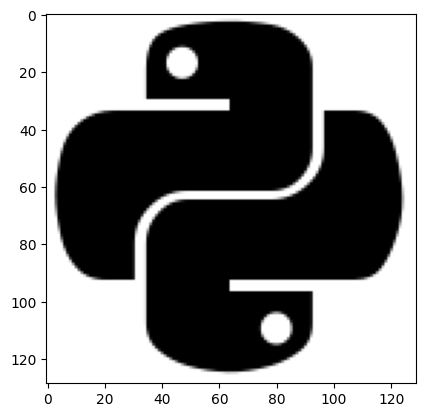

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

with open("images/example_buffs.bin", "rb") as f:
    iterator = lil_buff_writer.each_chunk(f)
    name, content = next(iterator)

    print(name.decode())

    result_name = f"images/decoded_{name.decode()}"

    with open(result_name, "wb") as image_file:
        image_file.write(content)
        
    image = Image.open(result_name)
    plt.imshow(image)

In [6]:
import shutil
shutil.rmtree("images")